今天我来带你进行 KNN 的学习，KNN 的英文叫 K-Nearest Neighbor，应该算是数据挖掘算法中最简单的一种。

我们先用一个例子体会下。

假设，我们想对电影的类型进行分类，统计了电影中打斗次数、接吻次数，当然还有其他的指标也可以被统计到，如下表所示。

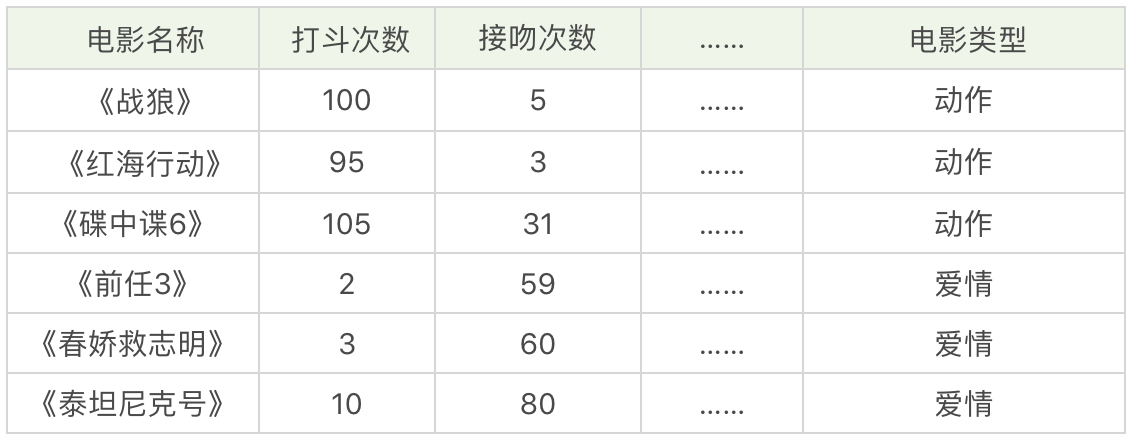

我们很容易理解《战狼》《红海行动》《碟中谍 6》是动作片，《前任 3》《春娇救志明》《泰坦尼克号》是爱情片，但是有没有一种方法让机器也可以掌握这个分类的规则，当有一部新电影的时候，也可以对它的类型自动分类呢？

我们可以把打斗次数看成 X 轴，接吻次数看成 Y 轴，然后在二维的坐标轴上，对这几部电影进行标记，如下图所示。对于未知的电影 A，坐标为 (x,y)，我们需要看下离电影 A 最近的都有哪些电影，这些电影中的大多数属于哪个分类，那么电影 A 就属于哪个分类。实际操作中，我们还需要确定一个 K 值，也就是我们要观察离电影 A 最近的电影有多少个。

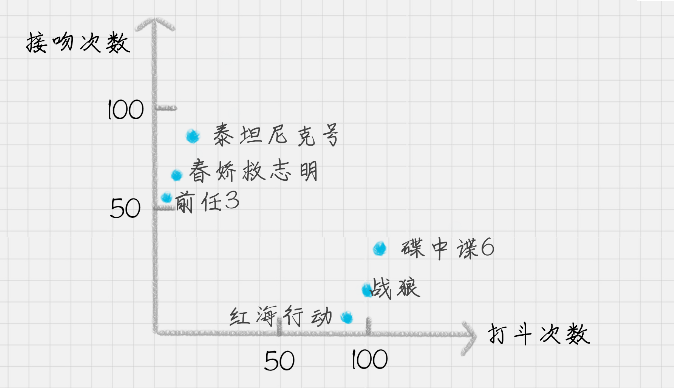

# KNN 的工作原理

“近朱者赤，近墨者黑”可以说是 KNN 的工作原理。整个计算过程分为三步：
* 1、计算待分类物体与其他物体之间的距离；
* 2、统计距离最近的 K 个邻居；
* 3、对于 K 个最近的邻居，它们属于哪个分类最多，待分类物体就属于哪一类。

**K 值如何选择**

你能看出整个 KNN 的分类过程，K 值的选择还是很重要的。那么问题来了，K 值选择多少是适合的呢？

如果 K 值比较小，就相当于未分类物体与它的邻居非常接近才行。这样产生的一个问题就是，如果邻居点是个噪声点，那么未分类物体的分类也会产生误差，这样 KNN 分类就会产生过拟合。

如果 K 值比较大，相当于距离过远的点也会对未知物体的分类产生影响，虽然这种情况的好处是鲁棒性强，但是不足也很明显，会产生欠拟合情况，也就是没有把未分类物体真正分类出来。

所以 K 值应该是个实践出来的结果，并不是我们事先而定的。在工程上，我们一般采用交叉验证的方式选取 K 值。

交叉验证的思路就是，把样本集中的大部分样本作为训练集，剩余的小部分样本用于预测，来验证分类模型的准确性。所以在 KNN 算法中，我们一般会把 K 值选取在较小的范围内，同时在验证集上准确率最高的那一个最终确定作为 K 值。

**距离如何计算**

在 KNN 算法中，还有一个重要的计算就是关于距离的度量。两个样本点之间的距离代表了这两个样本之间的相似度。距离越大，差异性越大；距离越小，相似度越大。

关于距离的计算方式有下面五种方式：

* 1、欧氏距离；
* 2、曼哈顿距离；
* 3、闵可夫斯基距离；
* 4、切比雪夫距离；
* 5、余弦距离。

其中前三种距离是 KNN 中最常用的距离，我给你分别讲解下。

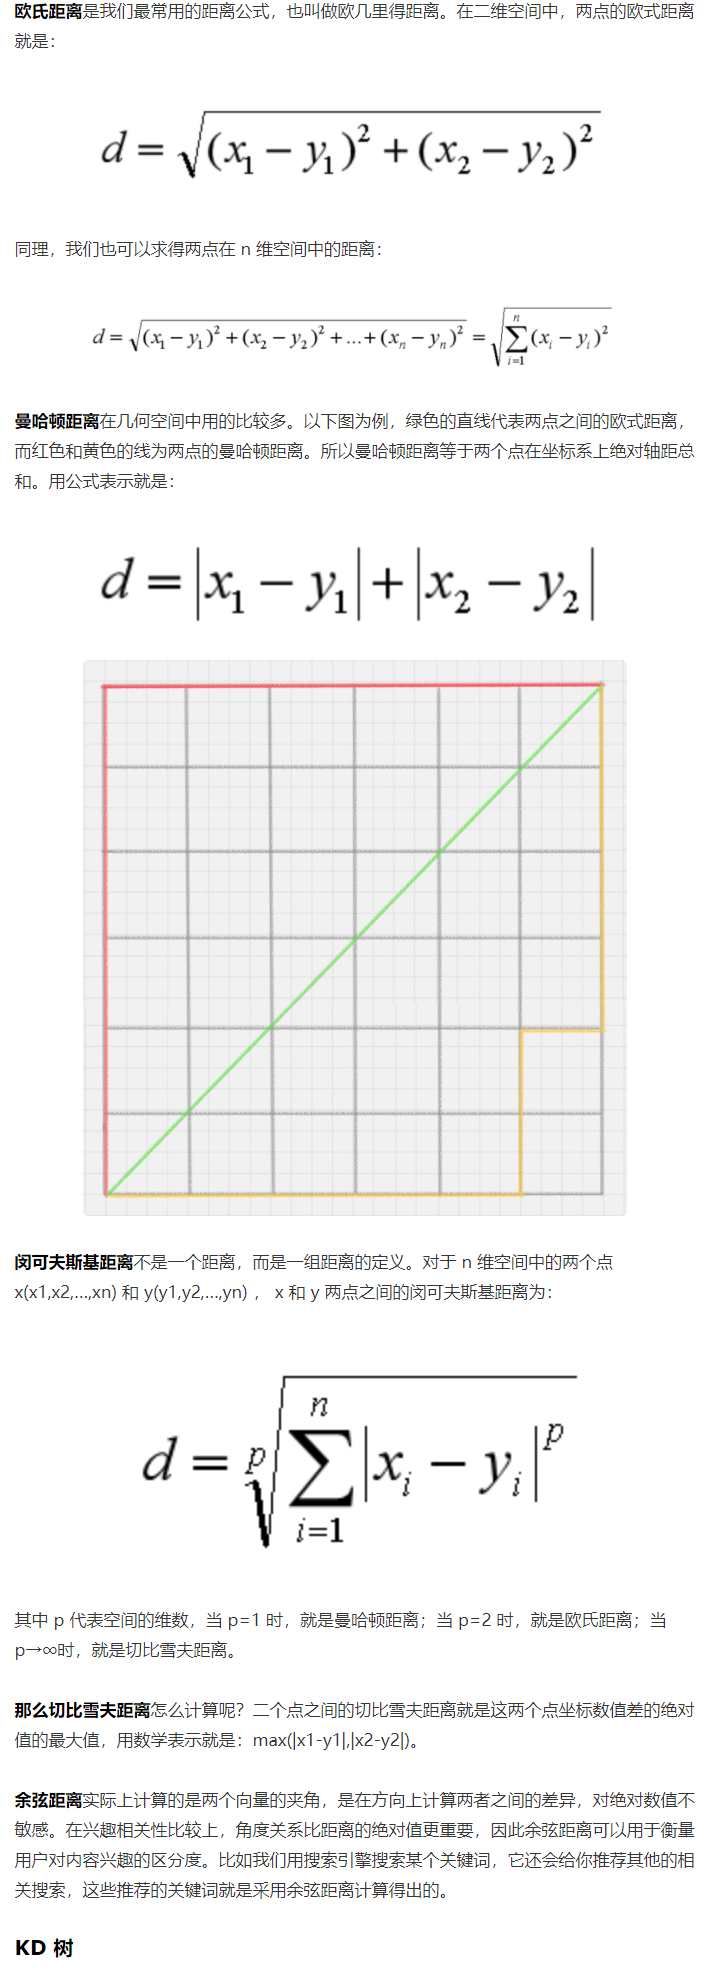

**KD 树**

其实从上文你也能看出来，KNN 的计算过程是大量计算样本点之间的距离。为了减少计算距离次数，提升 KNN 的搜索效率，人们提出了 KD 树（K-Dimensional 的缩写）。KD 树是对数据点在 K 维空间中划分的一种数据结构。在 KD 树的构造中，每个节点都是 k 维数值点的二叉树。既然是二叉树，就可以采用二叉树的增删改查操作，这样就大大提升了搜索效率。

在这里，我们不需要对 KD 树的数学原理了解太多，你只需要知道它是一个二叉树的数据结构，方便存储 K 维空间的数据就可以了。而且在 sklearn 中，我们直接可以调用 KD 树，很方便。

**用 KNN 做回归**

KNN 不仅可以做分类，还可以做回归。首先讲下什么是回归。在开头电影这个案例中，如果想要对未知电影进行类型划分，这是一个分类问题。首先看一下要分类的未知电影，离它最近的 K 部电影大多数属于哪个分类，这部电影就属于哪个分类。

如果是一部新电影，已知它是爱情片，想要知道它的打斗次数、接吻次数可能是多少，这就是一个回归问题。

那么 KNN 如何做回归呢？

对于一个新电影 X，我们要预测它的某个属性值，比如打斗次数，具体特征属性和数值如下所示。此时，我们会先计算待测点（新电影 X）到已知点的距离，选择距离最近的 K 个点。假设 K=3，此时最近的 3 个点（电影）分别是《战狼》，《红海行动》和《碟中谍 6》，那么它的打斗次数就是这 3 个点的该属性值的平均值，即 (100+95+105)/3=100 次。

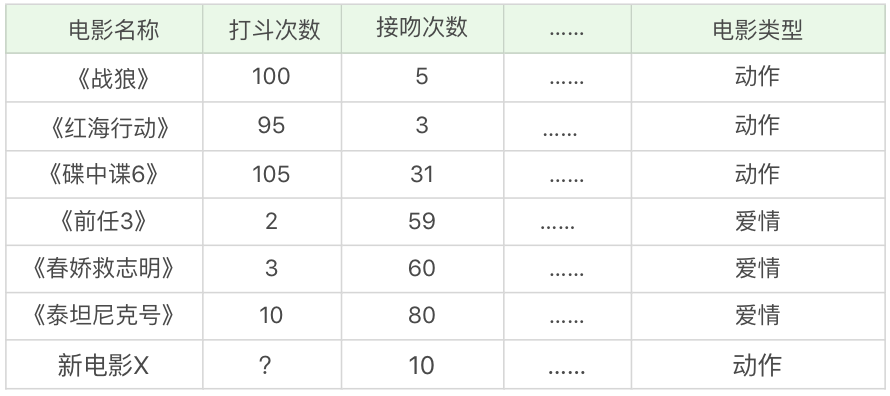

# 总结

今天我给你讲了 KNN 的原理，以及 KNN 中的几个关键因素。比如针对 K 值的选择，我们一般采用交叉验证的方式得出。针对样本点之间的距离的定义，常用的有 5 种表达方式，你也可以自己来定义两个样本之间的距离公式。不同的定义，适用的场景不同。比如在搜索关键词推荐中，余弦距离是更为常用的。

另外你也可以用 KNN 进行回归，通过 K 个邻居对新的点的属性进行值的预测。

KNN 的理论简单直接，针对 KNN 中的搜索也有相应的 KD 树这个数据结构。KNN 的理论成熟，可以应用到线性和非线性的分类问题中，也可以用于回归分析。

不过 KNN 需要计算测试点与样本点之间的距离，当数据量大的时候，计算量是非常庞大的，需要大量的存储空间和计算时间。另外如果样本分类不均衡，比如有些分类的样本非常少，那么该类别的分类准确率就会低很多。

当然在实际工作中，我们需要考虑到各种可能存在的情况，比如针对某类样本少的情况，可以增加该类别的权重。

同样 KNN 也可以用于推荐算法，虽然现在很多推荐系统的算法会使用 TD-IDF、协同过滤、Apriori 算法，不过针对数据量不大的情况下，采用 KNN 作为推荐算法也是可行的。

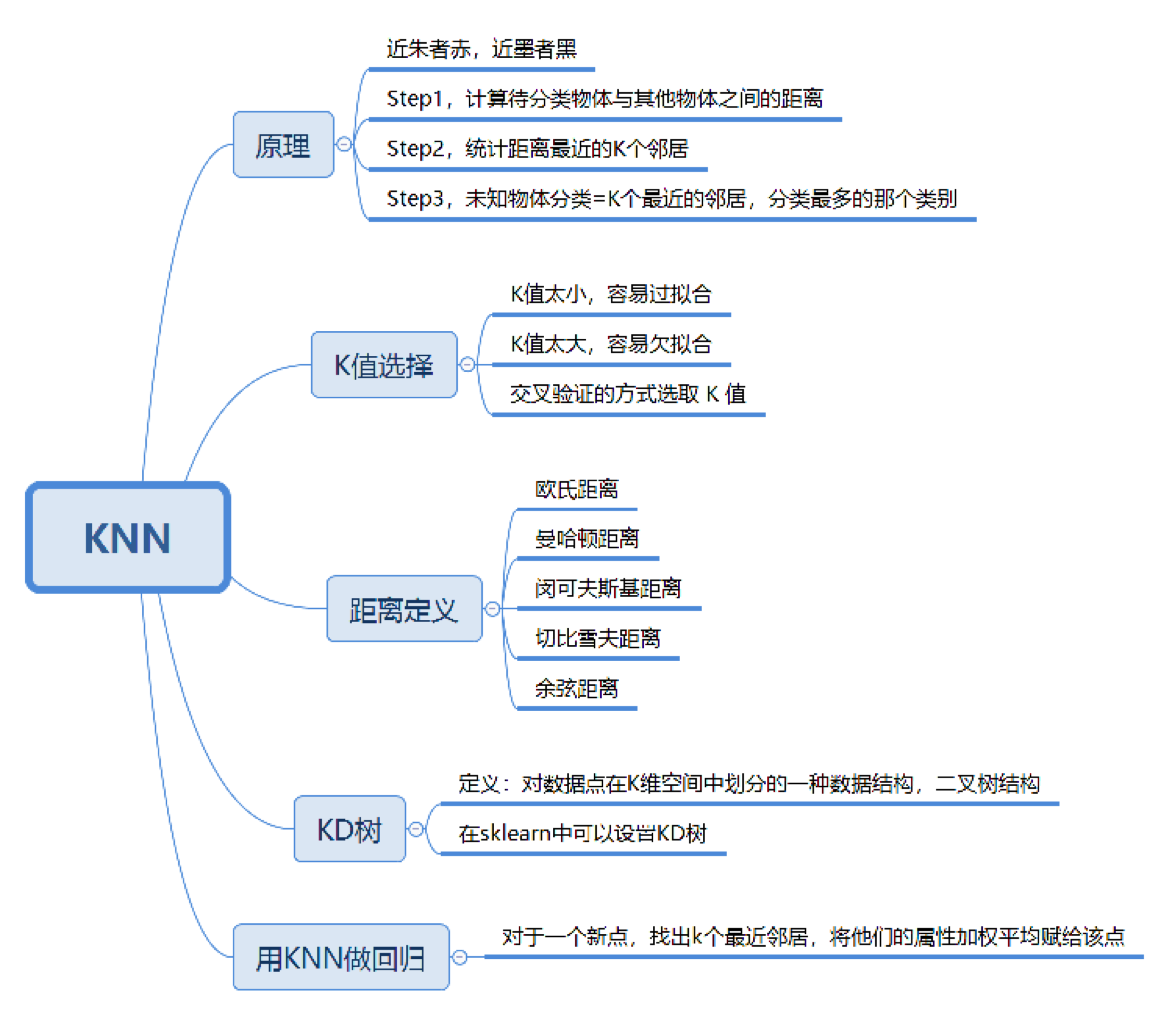